Name: Saleh Abdallah

In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

<< Part 1: Introduction to Data Types and Stor'fare Methods >>

    Theory:
        Discuss different types of data (e.g., numerical, categorical, text).
        [SA] Types of data:
                Categorical or Qualitative data such as country or gender.
                Numerical or Quantitative data such as price or discount.
                Text data such as reviews or comments.
                DateTime data such as date, month or year.
                Boolean data such as true or false.

        Explain stor'fare methods (e.g., databases, files, cloud stor'fare).
        [SA] Storage methods:
                Databases – stores structured raw data in tabular format.
                Files - such as csv/excel for structured data or json/xml for unstructered data.
                Data Warehouses – stores structured data for analytical purposes.
                Data Lakes – stores large volumes mostly of unstructured data.
                Cloud Storage – stores both structured and unstructured data.

    Hands-On:
        Load the Titanic dataset (available at the bottom of this p'fare) and explore different 
        types of data.


In [343]:
titanic = pd.read_csv('titanic.csv')
# Check dataset info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [344]:
# Check data types
titanic.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

*******************************************************************************************************

<< Part 2: Compare and Contrast Types of Data Sources >>

    Theory:
        Discuss various data sources (e.g., APIs, databases, CSV files, web scraping).
        [SA] Data sources:
                Sensors collect data from physical sensors (IoT devices).
                APIs allow systems to communicate and share data.
                Web scraping extracts data from websites using html parsing.
                Databases allows querying and extracting data.
                Cloud storage allows sharing and extracting data from cloud based services.
                Data lakes and warehouses aggregate large volumes of data from multiple sources 
                into centralized repositories.
                
    Hands-On:
        Write Python code to read data from different sources.

In [345]:
# Read data from CSV
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [346]:
# Read data from Database
import sqlite3

# SQLite db connection
conn = sqlite3.connect('Car_Database.db')

# Read the Customers table from the Car_DB
customers = pd.read_sql('SELECT * FROM Customers', conn)  
customers

,customer_id,first_name,last_name,gender,household_income,birthdate,phone_number,email
0,1,Jeremy,Jacobs,Male,120000,1990-12-12,9177554315,Jeremy@Gmail.com
1,2,Maria,Swabota,Female,60000,1980-06-15,7577749387,Maria@Gmail.com
2,3,Jacob,Wong,Male,24000,1992-02-20,2129990234,WonTon@hotmail.com
3,4,Pitbull,Perez,Male,1200000,1985-12-01,7892341827,Pitbull@ymail.com
4,5,Minnie,Mouse,Female,200000,1950-03-01,7542890987,MinnieMe@gmail.com
5,6,Jessica,Parker,Female,120000,1989-06-29,4245679000,JennyFromThePark@mymail.com


In [390]:
# API - Compare weather temperatures across Canada
# API key for accessing OpenWeather website
api_key = '0ae7ab17ab99715704d9573de2edcff2'

# List of cities
cities = ['Ottawa', 'Montreal', 'Toronto', 'Edmonton', 'Vancouver']

# Loop through the cities to pull the temperature data and print results
for city in cities:
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric'
    response = requests.get(url)
    weather = response.json()
    print(f'Temperature in {city}: {weather['main']['temp']} °C')

Temperature in Ottawa: -13.26 °C
Temperature in Montreal: -14.83 °C
Temperature in Toronto: -6.86 °C
Temperature in Edmonton: 7.31 °C
Temperature in Vancouver: 10.5 °C


In [451]:
# Read data from a website - Web Scraping
# Add the url and parse the html content
url = 'https://williscollege.com/about/'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

# Extract the header <h1>
header = soup.find('h1')
header_title = header.text.strip()

# Find the paragraphs tagged <p>
all_paragraphs = soup.find_all('p')

# Loop through all paragraphs to extract and clean the first 2 paragraphs
paragraphs = []
for paragraph in all_paragraphs:
    text = paragraph.text.strip()
    if text:  # Make sure the paragraph is valid
        clean_text = re.sub(r'\[.*?\]', '', text)  # Clean the text
        paragraphs.append(clean_text)

    if len(paragraphs) == 2:  # Count 2 paragraphs
        break   # Exit the loop after paragraph 2

# Print results
print(f'{header_title}\n')
for par in (paragraphs):
    print(f'{par}\n')

About Willis

For over 150 years, Willis College has secured a reputation as a top college dedicated to skills-training excellence. Today, Willis College continues to lead in employability skills training as one of the best colleges in Canada suited to the ever-changing and emerging demands of the labour market.

Willis College is proud to call the nation’s capital of Ottawa our home base. Alongside our Ottawa campus, we offer campuses in Winnipeg and offer online programs, allowing students from all corners of Canada to access exciting new career paths.



*******************************************************************************************************

<< Part 3: Structured vs. Unstructured Data >>

    Theory:
        Define structured data (e.g., databases, spreadsheets).
        [SA] Structured data refers to data that is organized in a tabular easily searchable 
            format. It is typically stored in databases or spreadsheets and follows a fixed
            schema or structure.

        Define unstructured data (e.g., text, im'fares).
        [SA] Unstructured data refers to data that does not have a predefined schema or 
            structure and varies in format such as text, images, videos and audio files.

    Hands-On:
        Create examples of structured and unstructured data using the Titanic dataset.

In [349]:
# Structured data
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


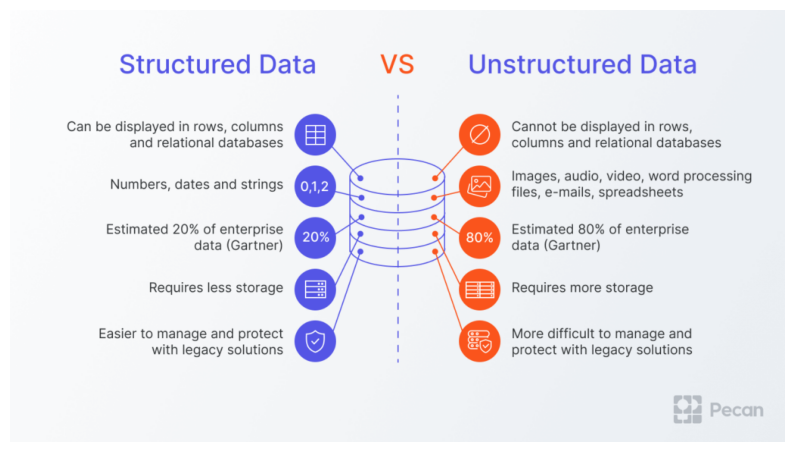

In [350]:
# Unstructured data
# Load image
image = Image.open('b9b40954-1c00-4406-b352-17ca1a919f71.png')
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis('off')  
plt.show()

*******************************************************************************************************

<<< Part 4: Storage Considerations >>>

    Theory:
        Discuss storage considerations (e.g., scalability, cost, speed, security).
    Hands-On:
        Implement storage solutions in Python.

*******************************************************************************************************

<< Part 5: Integrate and Use an API >>

    Theory:
        Explain what an API is and how it can be used to fetch data.
        [SA] An API, or Application Programming Interface, is a set of protocols and tools 
            that allow different software applications to interact with each other. 
            It provides access to data from external systems without needing to understand
            the underlying code or logic of those systems.        
    Hands-On:
        Introduce the OpenWeatherMap API and how to use it.
        Fetch weather data for the departure (Southampton) and arrival (New York) locations 
        of the Titanic.

In [352]:
# API key for accessing OpenWeather website
api_key = '0ae7ab17ab99715704d9573de2edcff2'

# List of cities
cities = ['Southampton', 'New York']

# Loop through the cities to pull the weather data and print results
for city in cities:
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric'
    response = requests.get(url)
    weather = response.json()
    print(f'Weather in {city}: {weather['main']}\n')

Weather in Southampton: {'temp': 4.65, 'feels_like': 4.65, 'temp_min': 3.34, 'temp_max': 5.6, 'pressure': 1032, 'humidity': 77, 'sea_level': 1032, 'grnd_level': 1028}

Weather in New York: {'temp': -0.15, 'feels_like': -6.61, 'temp_min': -1.14, 'temp_max': 1.27, 'pressure': 1018, 'humidity': 29, 'sea_level': 1018, 'grnd_level': 1017}



*******************************************************************************************************

<< Part 6: Data Quality Dimensions >>

    Theory:
        Discuss data quality dimensions (e.g., accuracy, completeness, consistency, timeliness).
        [SA] Data quality dimensions:
            1. Accuracy refers to the correctness and precision of the data compared to the 
                true or intended values.
            2. Completeness refers to the presence of all required data elements and records 
                in a dataset.
            3. Consistency refers to the uniformity and coherence of data across different
                datasets, sources, and time periods.
            4. Validity refers to the conformity and adherence of data to predefined rules,
                standards, and constraints.
            5. Timeliness refers to the currency and relevance of data with respect to the 
                intended use or analysis timeframe.

    Hands-On:
        Assess the quality of the Titanic dataset.

In [398]:
# Check the percentage of null values
null_values = round(titanic.isnull().sum()/titanic.shape[0]*100,1)
print(f'The percentage of null values in each column is:\n{null_values}\n')
# Drop columns with missing values exceed 30%
columns_to_drop = null_values[null_values > 30].index
titanic = titanic.drop(columns=columns_to_drop)
# Print remaining columns
print(f'Dropped columns: \n{columns_to_drop}\n')
print(f'Remaining columns: \n{titanic.columns}')

The percentage of null values in each column is:
pclass         0.0
survived       0.0
name           0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
ticket         0.0
fare           0.0
embarked       0.0
Family_Size    0.0
dtype: float64

Dropped columns: 
Index([], dtype='object')

Remaining columns: 
Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked', 'Family_Size'],
      dtype='object')


In [399]:
# Data Cleaning
# Fill missing value in 'name' with Unknown
titanic['name'].fillna('Unknown', inplace=True)
# Fill missing values with the mode in the following 'object' columns
for i in ['sex', 'ticket', 'embarked']:
    titanic[i].fillna(titanic[i].mode()[0], inplace=True)
# Fill missing values with the mode in the following 'numerical' columns
for i in ['pclass', 'survived','age', 'sibsp', 'parch', 'fare']:
    titanic[i].fillna(titanic[i].median(), inplace=True)

titanic.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
Family_Size    0
dtype: int64

In [449]:
# Check for duplicates
print(f'There are {titanic.duplicated().sum()} duplicates.')

There are 0 duplicates.


In [452]:
# Apply the IQR method to detect outliers in 'fare' 
# IQR rule
Q1 = titanic['fare'].quantile(0.25)  # First quartile 
Q3 = titanic['fare'].quantile(0.75)  # Third quartile 
IQR = Q3 - Q1  # Interquartile range
lower = Q1 - 1.5 * IQR  # Lower limit for outliers
upper = Q3 + 1.5 * IQR  # Upper limit for outliers
# Identify outliers
fare_outliers = (titanic['fare'] < lower) | (titanic['fare'] > upper)
# Remove the outliers 
titanic_no_outliers = titanic[~fare_outliers]
# Check the number of outliers removed
print(f'Removed {len(titanic) - len(titanic_no_outliers)} outliers')

Removed 171 outliers


*******************************************************************************************************

<< Part 7: Data Modeling >>

    Theory:
        Explain the concept of data modeling and its importance.
        [SA] Data modeling is the process of creating a visual representation of a system's data 
            elements and how they interact with one another. It is important because it helps in 
            organizing and structuring data, making it easier to manage and use effectively. 

    Hands-On:
        Create a simple data model for a Hotel Man'farement System.
        [SA] Hotel Management System - Data model (ERD)
                Entities and Relationships:
                    1.	Guest
                                Guest_ID (Primary Key)
                                First_Name
                                Last_Name
                                Date_of_Birth
                                Phone_Number
                                Email
                                Address                    
                    2.	Room
                                Room_ID (Primary Key)
                                Room_Number
                                Room_Type                     
                                Price_Per_Night
                                Availability
                    3.	Booking
                                Booking_ID (Primary Key)
                                Guest_ID (Foreign Key)
                                Room_ID (Foreign Key)
                                Booking_Date
                                Check_In_Date
                                Check_Out_Date                    
                                Booking_Status
                    4.	Payment
                                Payment_ID (Primary Key)
                                Booking_ID (Foreign Key)
                                Payment_Date
                                Payment_Method
                                Amount                    
                                Payment_Status
                
                Relationships:
                    Guest (1) >> Booking (M)
                    Room (1) >>  Booking (M)
                    Booking (1) >> Payment (M)


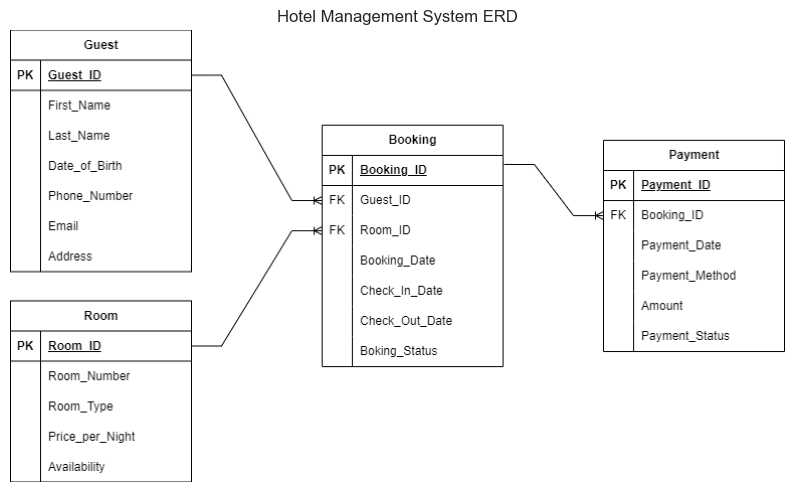

In [357]:
# Load ERD
image = Image.open('hotel.drawio.png')
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.title('Hotel Management System ERD')
plt.axis('off')  
plt.show()

*******************************************************************************************************

<< Part 8: Data Visualization >>

    Theory:
        Discuss the importance of data visualization.
        [SA] Data visualization is an important component in data analysis, it allows for 
            effective communication of complex data insights through graphical representations. 

    Hands-On:
        Create visualizations using matplotlib and seaborn.

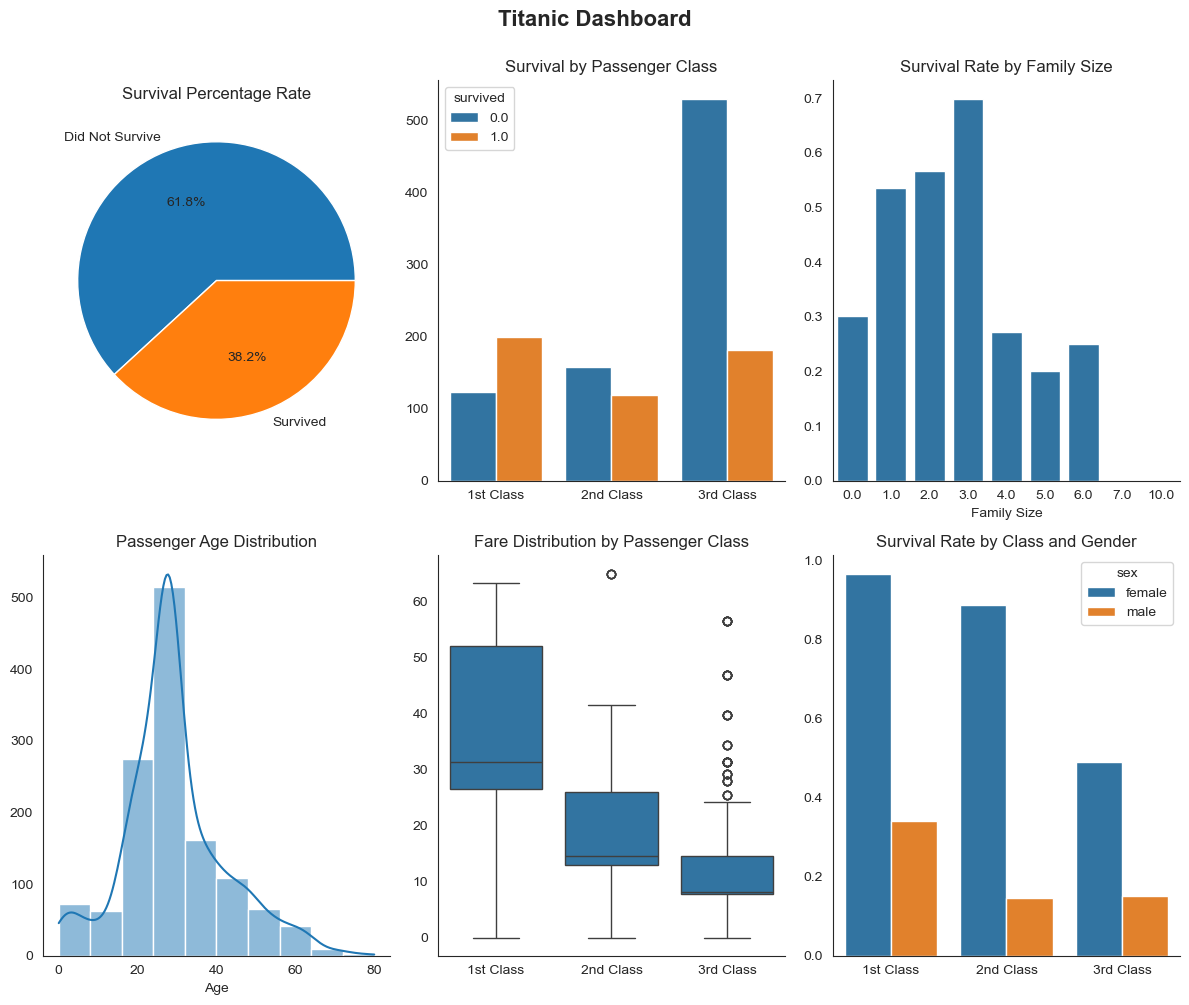

In [403]:
# Titanic Dashboard
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
fig.suptitle('Titanic Dashboard', fontsize=16, fontweight='bold', y=1)

# 1. Survival Count - Pie chart
survival_counts = titanic['survived'].value_counts()
axes[0, 0].pie(survival_counts, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%')
axes[0, 0].set_title('Survival Percentage Rate')

# 2. Survival by Class - Clustered bar chart
sns.countplot(data=titanic, x='pclass', hue='survived', ax=axes[0, 1])
axes[0, 1].set_title('Survival by Passenger Class')
axes[0, 1].set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
axes[0, 1].set_xlabel('')  
axes[0, 1].set_ylabel('')  

# 3. Survival by Family Size - Bar chart
# Calculate family size 
titanic['Family_Size'] = titanic['sibsp'] + titanic['parch']
sns.barplot(data=titanic, x="Family_Size", y="survived", ci=None, ax=axes[0, 2])
axes[0, 2].set_title('Survival Rate by Family Size')
axes[0, 2].set_xlabel('Family Size')  
axes[0, 2].set_ylabel('')  

# 4. Age Distribution by Survival - Histogram
sns.histplot(titanic['age'], kde=True, bins=10, ax=axes[1, 0])
axes[1, 0].set_title('Passenger Age Distribution')
axes[1, 0].set_xlabel('Age')  
axes[1, 0].set_ylabel('')  


# 5. Fare Distribution by Class - Box Plot
sns.boxplot(data=titanic_no_outliers, x='pclass', y='fare', ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution by Passenger Class')
axes[1, 1].set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
axes[1, 1].set_xlabel('')  
axes[1, 1].set_ylabel('')  

# 6. Survival rate by Class and Sex - Clustered bar chart
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic, ci=None)
axes[1, 2].set_title('Survival Rate by Class and Gender')
axes[1, 2].set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
axes[1, 2].set_xlabel('')  
axes[1, 2].set_ylabel('')  

# Layout adjustment
plt.tight_layout()
sns.despine()
plt.show()

*******************************************************************************************************

<< Part 9: Web Scraping >>

    Theory:
        Explain what web scraping is and its applications.
        [SA] Web scraping is extracting data from websites by parsing its HTML. 
            It is mostly used for accessing real time data on websites that do not 
            provide public APIs.
        
    Hands-On:
        Using Alpha Vantage free API service, use an API to extract data about 
        Market News and Sentiment. Use any topic of your interest. Analyze the data 
        and plot at least one graph on the extracted data.

In [436]:
import requests
import json
url = "https://www.alphavantage.co/query"
params = {
    "function": "NEWS_SENTIMENT",
    "apikey": "YEYW588J0YG4IYI1",
    'topics' : 'finance'
}
response = requests.get(url, params=params)
data = response.json()

In [437]:
# Save data to json file
with open('finance_data.json', 'w') as json_file:
    json.dump(data, json_file)

In [438]:
# Read json file
with open('finance_data.json', 'r') as json_file:
    news_json = json.load(json_file)

# Convert json data to df
df = pd.json_normalize(news_json['feed'], record_path='ticker_sentiment')
df.head()

,ticker,relevance_score,ticker_sentiment_score,ticker_sentiment_label
0,COIN,0.123738,0.086184,Neutral
1,CRYPTO:ETH,0.082677,0.120035,Neutral
2,CRYPTO:UNI,0.164468,0.147259,Neutral
3,LC,0.750264,0.231593,Somewhat-Bullish
4,BRK-A,0.114137,-0.031445,Neutral


In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ticker                  161 non-null    object
 1   relevance_score         161 non-null    object
 2   ticker_sentiment_score  161 non-null    object
 3   ticker_sentiment_label  161 non-null    object
dtypes: object(4)
memory usage: 5.2+ KB


In [440]:
# Convert relevance_score and ticker_sentiment_score to float 
df['relevance_score'] = df['relevance_score'].astype(float).round(2)
df['ticker_sentiment_score'] = df['ticker_sentiment_score'].astype(float).round(2)
df.dtypes

ticker                     object
relevance_score           float64
ticker_sentiment_score    float64
ticker_sentiment_label     object
dtype: object

In [441]:
df.head()

,ticker,relevance_score,ticker_sentiment_score,ticker_sentiment_label
0,COIN,0.12,0.09,Neutral
1,CRYPTO:ETH,0.08,0.12,Neutral
2,CRYPTO:UNI,0.16,0.15,Neutral
3,LC,0.75,0.23,Somewhat-Bullish
4,BRK-A,0.11,-0.03,Neutral


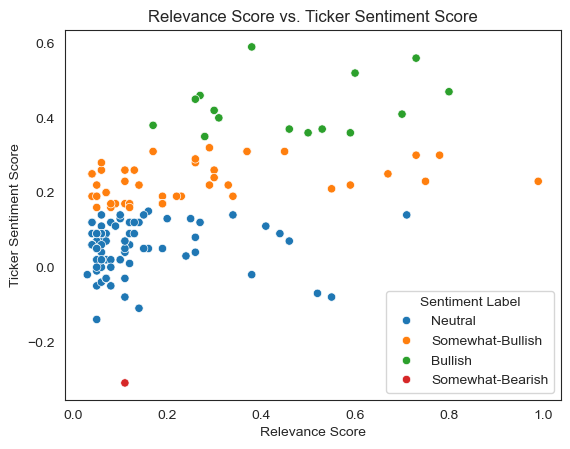

In [442]:
# Relevance Score vs. Ticker Sentiment Score scatter plot
sns.scatterplot(data=df, x='relevance_score', y='ticker_sentiment_score', hue='ticker_sentiment_label')
plt.title('Relevance Score vs. Ticker Sentiment Score')
plt.xlabel('Relevance Score')
plt.ylabel('Ticker Sentiment Score')
plt.legend(title='Sentiment Label', loc='lower right')
plt.show()

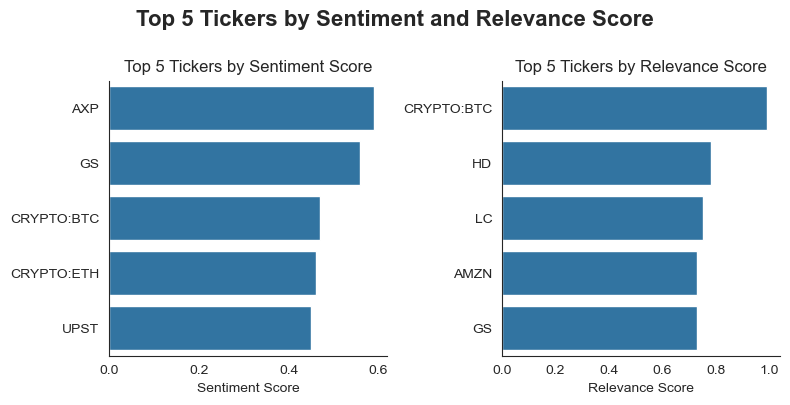

In [471]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Top 5 Tickers by Sentiment and Relevance Score', fontsize=16, fontweight='bold', y=1)
# Top 5 Tickers by Sentiment Score
top_tickers_s = df.sort_values(by='ticker_sentiment_score', ascending=False).drop_duplicates(subset='ticker').head(5)
sns.barplot(data=top_tickers_s, x='ticker_sentiment_score', y='ticker', ax=axes[0], ci=None)
axes[0].set_title('Top 5 Tickers by Sentiment Score')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('')
# Top 5 Tickers by Relevance Score
top_tickers_r = df.sort_values(by='relevance_score', ascending=False).drop_duplicates(subset='ticker').head(5)
sns.barplot(data=top_tickers_r, x='relevance_score', y='ticker', ax=axes[1],  ci=None)
axes[1].set_title('Top 5 Tickers by Relevance Score')
axes[1].set_xlabel('Relevance Score')
axes[1].set_ylabel('')
plt.tight_layout()
sns.despine()
plt.show()